In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
#!pip uninstall gradientcorrection  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

  Using cached https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main
  Created wheel for gradientcorrection: filename=gradientcorrection-0.1-py3-none-any.whl size=8546 sha256=efeb1bbcba12202a84db887c79774cdde6bfbdaac414f801efa7104deac0064f
  Stored in directory: /tmp/pip-ephem-wheel-cache-pk4j3ive/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradientcorrection


In [2]:
import gradientcorrection
from gradientcorrection import layers, utils, metrics, helper, explain, model_zoo, geomath

In [ ]:
'''################################################################################# TRAINING 


import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
#from tfomics import utils, metrics


#------------------------------------------------------------------------

num_trials = 50  
model_names = ['cnn-dist', 'cnn-local'] #model_names = ['cnn-dist', 'cnn-local']
activations = ['relu', 'exponential']  #  ['exponential']  

results_path = utils.make_directory('drive/My Drive/results', 'task3')  #utils.make_directory('../results', 'task3')
params_path = utils.make_directory(results_path, 'model_params')  #utils.make_directory(results_path, 'model_params')

#------------------------------------------------------------------------


# load data
data_path = 'drive/My Drive/data/synthetic_code_dataset.h5'
data = helper.load_data(data_path)  #helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

#------------------------------------------------------------------------

with open(os.path.join(results_path, 'task3_classification_performance.tsv'), 'w') as f:
    f.write('%s\t%s\t%s\n'%('model', 'ave roc', 'ave pr'))

    results = {}
    for model_name in model_names:
        for activation in activations:
            base_name = model_name+'_'+activation
            print(base_name)
            results[base_name] = {}
            
            trial_roc_mean = []
            trial_roc_std = []
            trial_pr_mean = []
            trial_pr_std = []
            for trial in range(num_trials):
                keras.backend.clear_session()
                
                # load model
                model = helper.load_model(model_name, activation=activation)  
                name = base_name+'_'+str(trial)
                print('model: ' + name)

                # compile model
                helper.compile_model(model)  #helper.compile_model(model)

                # setup callbacks
                callbacks = helper.get_callbacks(monitor='val_auroc', patience=20,   #callbacks = helper.get_callbacks(monitor='val_auroc', patience=20,
                                          decay_patience=5, decay_factor=0.2)   #it was 5

                # fit model
                history = model.fit(x_train, y_train, 
                                    epochs=100,
                                    batch_size=100, 
                                    shuffle=True,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=callbacks)

                # save model
                weights_path = os.path.join(params_path, name+'.hdf5')
                model.save_weights(weights_path)

                # predict test sequences and calculate performance metrics
                predictions = model.predict(x_test)                
                mean_vals, std_vals = metrics.calculate_metrics(y_test, predictions, 'binary')

                trial_roc_mean.append(mean_vals[1])
                trial_roc_std.append(std_vals[1])
                trial_pr_mean.append(mean_vals[2])
                trial_pr_std.append(std_vals[2])


            results[base_name] = [np.array(trial_roc_mean), np.array(trial_pr_mean)]
            f.write("%s\t%.3f+/-%.3f\t%.3f+/-%.3f\n"%(base_name, 
                                                      np.mean(trial_roc_mean),
                                                      np.std(trial_roc_mean), 
                                                      np.mean(trial_pr_mean),
                                                      np.std(trial_pr_mean)))

# save results
file_path = os.path.join(results_path, 'task3_performance_results.pickle')
with open(file_path, 'wb') as f:
    cPickle.dump(results, f, protocol=cPickle.HIGHEST_PROTOCOL)



In [ ]:
################# MOCK TRAINING, FOR TESTING (results_path changed not to overwrite official data)


import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
#from tfomics import utils, metrics


#------------------------------------------------------------------------

num_trials = 50  
model_names = ['cnn-dist', 'cnn-local'] #model_names = ['cnn-dist', 'cnn-local']
activations = ['relu', 'exponential']  #  ['exponential']  

results_path = utils.make_directory('drive/My Drive/results_mock', 'task3')  #utils.make_directory('../results', 'task3')
params_path = utils.make_directory(results_path, 'model_params')  #utils.make_directory(results_path, 'model_params')

#------------------------------------------------------------------------


# load data
data_path = 'drive/My Drive/data/synthetic_code_dataset.h5'
data = helper.load_data(data_path)  #helper.load_data(data_path)  
x_train, y_train, x_valid, y_valid, x_test, y_test = data

#------------------------------------------------------------------------

with open(os.path.join(results_path, 'task3_classification_performance.tsv'), 'w') as f:
    f.write('%s\t%s\t%s\n'%('model', 'ave roc', 'ave pr'))

    results = {}
    for model_name in model_names:
        for activation in activations:
            base_name = model_name+'_'+activation
            print(base_name)
            results[base_name] = {}
            
            trial_roc_mean = []
            trial_roc_std = []
            trial_pr_mean = []
            trial_pr_std = []
            for trial in range(num_trials):
                keras.backend.clear_session()
                
                # load model
                model = helper.load_model(model_name, activation=activation)  
                name = base_name+'_'+str(trial)
                print('model: ' + name)

                # compile model
                helper.compile_model(model)  #helper.compile_model(model)

                # setup callbacks
                callbacks = helper.get_callbacks(monitor='val_auroc', patience=20,   #callbacks = helper.get_callbacks(monitor='val_auroc', patience=20,
                                          decay_patience=5, decay_factor=0.2)   #it was 5

                # fit model
                history = model.fit(x_train, y_train, 
                                    epochs=100,
                                    batch_size=100, 
                                    shuffle=True,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=callbacks)

                # save model
                weights_path = os.path.join(params_path, name+'.hdf5')
                model.save_weights(weights_path)

                # predict test sequences and calculate performance metrics
                predictions = model.predict(x_test)                
                mean_vals, std_vals = metrics.calculate_metrics(y_test, predictions, 'binary')

                trial_roc_mean.append(mean_vals[1])
                trial_roc_std.append(std_vals[1])
                trial_pr_mean.append(mean_vals[2])
                trial_pr_std.append(std_vals[2])


            results[base_name] = [np.array(trial_roc_mean), np.array(trial_pr_mean)]
            f.write("%s\t%.3f+/-%.3f\t%.3f+/-%.3f\n"%(base_name, 
                                                      np.mean(trial_roc_mean),
                                                      np.std(trial_roc_mean), 
                                                      np.mean(trial_pr_mean),
                                                      np.std(trial_pr_mean)))

# save results
file_path = os.path.join(results_path, 'task3_performance_results.pickle')
with open(file_path, 'wb') as f:
    cPickle.dump(results, f, protocol=cPickle.HIGHEST_PROTOCOL)



In [3]:
# TEMPORARY
results_path = utils.make_directory('drive/My Drive/results', 'task3')  #utils.make_directory('../results', 'task3')
params_path = utils.make_directory(results_path, 'model_params')  #utils.make_directory(results_path, 'model_params')

In [4]:
######################################################################## Generate attribution maps
import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras

saliencyCOS_print=[]
integratedCOS_print=[]
saliency1AUROC_AUPR_print=[]
saliency2AUROC_AUPR_print=[]
integrated1AUROC_AUPR_print=[]
integrated2AUROC_AUPR_print=[]
attr_score1_cumulative = []
attr_score2_cumulative = []
saliency_map_raw_cumulative = []

#------------------------------------------------------------------------

num_trials = 50
model_names = ['cnn-dist'] #['cnn-dist', 'cnn-local']
activations = ['exponential']  # ['relu', 'exponential']

save_path = utils.make_directory(results_path, 'scores')

#------------------------------------------------------------------------

# load data
data_path = 'drive/My Drive/data/synthetic_code_dataset.h5'
data = helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

# load ground truth values
test_model = helper.load_synthetic_models(data_path, dataset='test')
true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]  
X_model = test_model[true_index][:500]   

#------------------------------------------------------------------------

for model_name in model_names:
    for activation in activations:
        
        saliency_scores = []
        mut_scores = []
        integrated_scores = []
        shap_scores = []
        for trial in range(num_trials):
            keras.backend.clear_session()
            
            # load model
            model = helper.load_model(model_name, activation=activation)
            name = model_name+'_'+activation+'_'+str(trial)
            print('model: ' + name)

            # compile model
            helper.compile_model(model)

            # load model
            weights_path = os.path.join(params_path, name+'.hdf5')
            model.load_weights(weights_path)

            # interpretability performance with saliency maps
            print('saliency maps')
            saliency_scores.append(explain.saliency(model, X, class_index=0, layer=-1))

            # interpretability performance with integrated gradients
            print('integrated gradients maps')
            integrated_scores.append(explain.integrated_grad(model, X, class_index=0, layer=-1,
                                                        num_background=10, num_steps=20,
                                                        reference='shuffle'))    


############ CORRECTION PART , Comparison of attribution maps

            #### Ground truth = probability normalized. (For example, non-informative positions in prob. space such as [0.25, 0.25, 0.25, 0.25] should be mapped to [0,0,0,0])
            X_model_normalized =  np.swapaxes(X_model, 1,2) -0.25

            #Raw saliency scores.  
            saliency_map_raw = np.array(saliency_scores) [trial]
            integrated_map_raw = np.array(integrated_scores) [trial]


            #################### Full saliency, 4 derivatives
            attr_score1 = saliency_map_raw 
            attr_score2 = saliency_map_raw - 0.25 * np.sum(saliency_map_raw,axis=2, keepdims=True)
            #################### Full integrated gradients, 4 derivatives 
            attr_score1_integrated = integrated_map_raw
            attr_score2_integrated = integrated_map_raw -0.25 * np.sum(integrated_map_raw, axis=2, keepdims=True) 

            #################### Wild nucleotides only, only 1 derivative, corresponding to the nucleotide present. Obtained by multiplying by X. 
            attr_score_wild = saliency_map_raw * X 
            attr_score_wild2 = ( saliency_map_raw - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True)  ) * X            
            #################### Wild, integrated gradients
            #Default
            attr_score_wild_integrated = integrated_map_raw * X 
            attr_score_wild_integrated2 = ( integrated_map_raw - 0.25 * np.sum(integrated_map_raw, axis=2, keepdims=True)  ) * X
            
            #Cosine (full map, 4 derivatives)
            saliencyCOS_print.append([geomath.Scalar_product(attr_score1, X_model_normalized), geomath.Scalar_product(attr_score2, X_model_normalized)]) 
            integratedCOS_print.append([geomath.Scalar_product(attr_score1_integrated, X_model_normalized), geomath.Scalar_product(attr_score2_integrated, X_model_normalized)])
            #AUROC and AUPR, only the wild nucleotide derivative 
            saliency1AUROC_AUPR_print.append([np.average(helper.interpretability_performance(X, attr_score_wild, X_model)[0]) , np.average(helper.interpretability_performance(X, attr_score_wild, X_model)[1]) ])
            integrated1AUROC_AUPR_print.append([np.average(helper.interpretability_performance(X, attr_score_wild_integrated, X_model)[0]) , np.average(helper.interpretability_performance(X, attr_score_wild_integrated, X_model)[1]) ])
            saliency2AUROC_AUPR_print.append([np.average(helper.interpretability_performance(X, attr_score_wild2, X_model)[0]) , np.average(helper.interpretability_performance(X, attr_score_wild2, X_model)[1]) ])
            integrated2AUROC_AUPR_print.append([np.average(helper.interpretability_performance(X, attr_score_wild_integrated2, X_model)[0]) , np.average(helper.interpretability_performance(X, attr_score_wild_integrated2, X_model)[1])])

            # Here, "cumulative" stands for results from many runs appended 
            attr_score1_cumulative.append(attr_score1)
            attr_score2_cumulative.append(attr_score2)
            saliency_map_raw_cumulative.append(saliency_map_raw)

            #np.savetxt('drive/My Drive/results/' + "saliencyCosine.txt", saliencyCOS_print , delimiter=",") 
                


Instructions for updating:
Colocations handled automatically by placer.
model: cnn-dist_exponential_0
saliency maps

integrated gradients maps
model: cnn-dist_exponential_1
saliency maps
integrated gradients maps
model: cnn-dist_exponential_2
saliency maps
integrated gradients maps
model: cnn-dist_exponential_3
saliency maps
integrated gradients maps
model: cnn-dist_exponential_4
saliency maps
integrated gradients maps
model: cnn-dist_exponential_5
saliency maps
integrated gradients maps
model: cnn-dist_exponential_6
saliency maps
integrated gradients maps
model: cnn-dist_exponential_7
saliency maps
integrated gradients maps
model: cnn-dist_exponential_8
saliency maps
integrated gradients maps
model: cnn-dist_exponential_9
saliency maps
integrated gradients maps
model: cnn-dist_exponential_10
saliency maps
integrated gradients maps
model: cnn-dist_exponential_11
saliency maps
integrated gradients maps
model: cnn-dist_exponential_12
saliency maps
integrated gradients maps
model: cnn-dis

In [27]:
######################################################################## Generate performance maps

performance_map={}
#------------------------------------------------------------------------

num_trials = 50
model_names = ['cnn-local', 'cnn-dist'] #['cnn-dist', 'cnn-local']
activations = ['relu','exponential']  # ['relu', 'exponential']

#------------------------------------------------------------------------

# load data
data_path = 'drive/My Drive/data/synthetic_code_dataset.h5'
data = helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

#------------------------------------------------------------------------

for model_name in model_names:
    for activation in activations:
        
        performance_list=[]
        for trial in range(num_trials):
            keras.backend.clear_session()
            
            # load model
            model = helper.load_model(model_name, activation=activation)
            name = model_name+'_'+activation+'_'+str(trial)
            print('model: ' + name)

            # compile model
            helper.compile_model(model)

            # load model
            weights_path = os.path.join(params_path, name+'.hdf5')
            model.load_weights(weights_path)

            #Evaluate, populate lists 
            predictions = model.predict(x_test)                
            mean_vals, std_vals = metrics.calculate_metrics(y_test, predictions, 'binary')
            performance_list.append(mean_vals[1])
        performance_map[model_name + "_" + activation] =performance_list         


model: cnn-local_relu_0


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


model: cnn-local_relu_1
model: cnn-local_relu_2
model: cnn-local_relu_3
model: cnn-local_relu_4
model: cnn-local_relu_5
model: cnn-local_relu_6
model: cnn-local_relu_7
model: cnn-local_relu_8
model: cnn-local_relu_9
model: cnn-local_relu_10
model: cnn-local_relu_11
model: cnn-local_relu_12
model: cnn-local_relu_13
model: cnn-local_relu_14
model: cnn-local_relu_15
model: cnn-local_relu_16
model: cnn-local_relu_17
model: cnn-local_relu_18
model: cnn-local_relu_19
model: cnn-local_relu_20
model: cnn-local_relu_21
model: cnn-local_relu_22
model: cnn-local_relu_23
model: cnn-local_relu_24
model: cnn-local_relu_25
model: cnn-local_relu_26
model: cnn-local_relu_27
model: cnn-local_relu_28
model: cnn-local_relu_29
model: cnn-local_relu_30
model: cnn-local_relu_31
model: cnn-local_relu_32
model: cnn-local_relu_33
model: cnn-local_relu_34
model: cnn-local_relu_35
model: cnn-local_relu_36
model: cnn-local_relu_37
model: cnn-local_relu_38
model: cnn-local_relu_39
model: cnn-local_relu_40
model: cn

In [5]:
#Ensemble averages
attr_score1_AVERAGE = np.average(np.array(attr_score1_cumulative)  , axis = 0)
attr_score2_AVERAGE = np.average(np.array(attr_score2_cumulative)  , axis = 0)
saliency_map_raw_AVERAGE = np.average(np.array(saliency_map_raw_cumulative)  , axis = 0)

In [6]:
saliency_map_raw_AVERAGE_CORRECTED = saliency_map_raw_AVERAGE - 0.25* np.sum(saliency_map_raw_AVERAGE, axis=2, keepdims=True)
saliency_map_raw_CORRECTED = saliency_map_raw - 0.25* np.sum(saliency_map_raw, axis=2, keepdims=True)


In [ ]:
'''#Saliency - only saved once??? Commented out for security. 

filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUROC.txt"
np.savetxt(filename, np.array(saliency1AUROC_AUPR_print)[:,0] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUPR.txt"
np.savetxt(filename, np.array(saliency1AUROC_AUPR_print)[:,1] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyCOSINE.txt"
np.savetxt(filename, np.array(saliencyCOS_print)[:,0] , delimiter=",") 


filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUROC_corrected.txt"
np.savetxt(filename, np.array(saliency2AUROC_AUPR_print)[:,0] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUPR_corrected.txt"
np.savetxt(filename, np.array(saliency2AUROC_AUPR_print)[:,1] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyCOSINE_corrected.txt"
np.savetxt(filename, np.array(saliencyCOS_print)[:,1] , delimiter=",") 



# IG
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUROC.txt"
np.savetxt(filename, np.array(integrated1AUROC_AUPR_print)[:,0] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUPR.txt"
np.savetxt(filename, np.array(integrated1AUROC_AUPR_print)[:,1] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_COSINE.txt"
np.savetxt(filename, np.array(integratedCOS_print)[:,0] , delimiter=",") 


filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUROC_corrected.txt"
np.savetxt(filename, np.array(integrated2AUROC_AUPR_print)[:,0] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUPR_corrected.txt"
np.savetxt(filename, np.array(integrated2AUROC_AUPR_print)[:,1] , delimiter=",") 
filename = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_COSINE_corrected.txt"
np.savetxt(filename, np.array(integratedCOS_print)[:,1] , delimiter=",") 


In [22]:
#Saliency and IG load

model_name = 'cnn-dist' #['cnn-dist', 'cnn-local']
activation = 'exponential'  # ['relu', 'exponential', 'sigmoid', 'tanh', 'softplus', 'linear', 'elu']

filenameSAL_AUROC = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUROC.txt"
filenameSAL_AUPR = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUPR.txt"
filenameSAL_COSINE = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyCOSINE.txt"

filenameSAL_AUROC_c = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUROC_corrected.txt"
filenameSAL_AUPR_c = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyAUPR_corrected.txt"
filenameSAL_COSINE_c = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "saliencyCOSINE_corrected.txt"


# IG
filenameIG_AUROC = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUROC.txt"
filenameIG_AUPR = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUPR.txt"
filenameIG_COSINE = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_COSINE.txt"

filenameIG_AUROC_c = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUROC_corrected.txt"
filenameIG_AUPR_c = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_AUPR_corrected.txt"
filenameIG_COSINE_c = 'drive/My Drive/results/' + model_name + "_" + activation + "_" + "IG_COSINE_corrected.txt"


In [16]:
[model_name + "_" + activation]

['cnn-local_relu']

In [23]:
#Load the interpretability data.
from numpy import loadtxt
#Saliency
'''SAL_AUROC={}
SAL_AUROC_c={}
SAL_AUPR={}
SAL_AUPR_c={}
SAL_COSINE={}
SAL_COSINE_c={}
IG_AUROC={}
IG_AUROC_c={}
IG_AUPR={}
IG_AUPR_c={}
IG_COSINE={}
IG_COSINE_c={}'''

SAL_AUROC[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUROC, comments="#", delimiter="\n", unpack=False))
SAL_AUPR[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUPR, comments="#", delimiter="\n", unpack=False))
SAL_COSINE[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_COSINE, comments="#", delimiter="\n", unpack=False))

SAL_AUROC_c[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUROC_c, comments="#", delimiter="\n", unpack=False))
SAL_AUPR_c[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_AUPR_c, comments="#", delimiter="\n", unpack=False))
SAL_COSINE_c[model_name + "_" + activation] = np.array(loadtxt(filenameSAL_COSINE_c, comments="#", delimiter="\n", unpack=False))

#IG
IG_AUROC[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUROC, comments="#", delimiter="\n", unpack=False))
IG_AUPR[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUPR, comments="#", delimiter="\n", unpack=False))
IG_COSINE[model_name + "_" + activation] = np.array(loadtxt(filenameIG_COSINE, comments="#", delimiter="\n", unpack=False))

IG_AUROC_c[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUROC_c, comments="#", delimiter="\n", unpack=False))
IG_AUPR_c[model_name + "_" + activation] = np.array(loadtxt(filenameIG_AUPR_c, comments="#", delimiter="\n", unpack=False))
IG_COSINE_c[model_name + "_" + activation] = np.array(loadtxt(filenameIG_COSINE_c, comments="#", delimiter="\n", unpack=False))


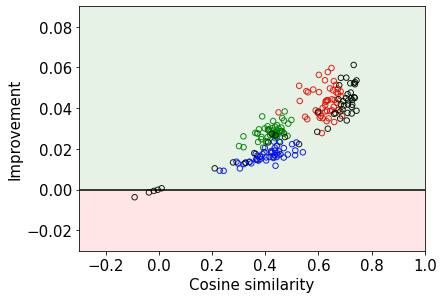

In [24]:
# Saliency Cosine
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.add_patch( patches.Rectangle( (-0.3, 0), 1.3, 0.09, facecolor = 'green', fill=True , alpha=0.1 ) )
ax1.add_patch( patches.Rectangle( (-0.3, 0), 1.3, -0.03, facecolor = 'red', fill=True , alpha=0.1 ) )

alpha=0.9
#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-local_relu'], SAL_COSINE_c['cnn-local_relu']-SAL_COSINE['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'
mean1a=np.average(SAL_COSINE_c['cnn-local_relu']-SAL_COSINE['cnn-local_relu'])

#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-local_exponential'], SAL_COSINE_c['cnn-local_exponential']-SAL_COSINE['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)
mean1b=np.average(SAL_COSINE_c['cnn-local_exponential']-SAL_COSINE['cnn-local_exponential'])

#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-dist_relu'], SAL_COSINE_c['cnn-dist_relu']-SAL_COSINE['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)
mean1c=np.average(np.nan_to_num(SAL_COSINE_c['cnn-dist_relu']-SAL_COSINE['cnn-dist_relu']))

#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-dist_exponential'], SAL_COSINE_c['cnn-dist_exponential']-SAL_COSINE['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)
mean1d=np.average(np.nan_to_num(SAL_COSINE_c['cnn-dist_exponential']-SAL_COSINE['cnn-dist_exponential']))


#ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#ax1.set_aspect('equal')
#ax1.set_xlim(-0.03,0.19)
#ax1.set_ylim(-0.05,0.09)


x__ = np.linspace(-0.3, 1.0, 100)
ax1.plot(x__, x__*0, c="black");

ax1.set_xlim(-0.3,1.0)
ax1.set_ylim(-0.03,0.09)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)    
fig.tight_layout()  #To prevent filesave cutting of the outside parts of the figure. 

#plt.legend(loc='lower right');
plt.xlabel('Cosine similarity', fontsize=15)
plt.ylabel('Improvement', fontsize=15)
plt.savefig('drive/My Drive/results/Cosine_Saliency.pdf', bbox_inches='tight')  
plt.show()

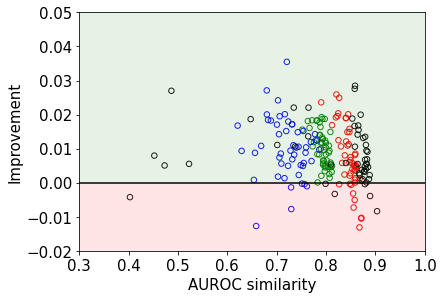

In [25]:
#Saliency AUROC
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.add_patch( patches.Rectangle( (0.3, 0), 0.7, 0.05, facecolor = 'green', fill=True , alpha=0.1 ) )
ax1.add_patch( patches.Rectangle( (0.3, 0), 0.7, -0.02, facecolor = 'red', fill=True , alpha=0.1 ) )

alpha=0.9
#---------------------
#Cosine
ax1.scatter(SAL_AUROC['cnn-local_relu'], SAL_AUROC_c['cnn-local_relu']-SAL_AUROC['cnn-local_relu'], s=30, edgecolors='g', facecolors='none', marker="o", alpha=alpha) #label='AUROC'
mean2a=np.average(SAL_AUROC_c['cnn-local_relu']-SAL_AUROC['cnn-local_relu'])

#---------------------
#Cosine
ax1.scatter(SAL_AUROC['cnn-local_exponential'], SAL_AUROC_c['cnn-local_exponential']-SAL_AUROC['cnn-local_exponential'], s=30, edgecolors='r', facecolors='none', marker="o", alpha=alpha)
mean2b=np.average(SAL_AUROC_c['cnn-local_exponential']-SAL_AUROC['cnn-local_exponential'])

#---------------------
#Cosine
ax1.scatter(SAL_AUROC['cnn-dist_relu'], SAL_AUROC_c['cnn-dist_relu']-SAL_AUROC['cnn-dist_relu'], s=30, edgecolors='b', facecolors='none', marker="o", alpha=alpha)
mean2c=np.average(SAL_AUROC_c['cnn-dist_relu']-SAL_AUROC['cnn-dist_relu'])

#---------------------
#Cosine
ax1.scatter(SAL_AUROC['cnn-dist_exponential'], SAL_AUROC_c['cnn-dist_exponential']-SAL_AUROC['cnn-dist_exponential'], s=30, edgecolors='black', facecolors='none', marker="o", alpha=alpha)
mean2d=np.average(SAL_AUROC_c['cnn-dist_exponential']-SAL_AUROC['cnn-dist_exponential'])

x__ = np.linspace(0.3, 1.0, 100)
ax1.plot(x__, x__*0, c="black");

ax1.set_xlim(0.3,1.0)
ax1.set_ylim(-0.02,0.05)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)    
fig.tight_layout()  #To prevent filesave cutting of the outside parts of the figure. 

plt.xlabel('AUROC similarity', fontsize=15)
plt.ylabel('Improvement', fontsize=15)
plt.savefig('drive/My Drive/results/AUROC_Saliency.pdf')  
plt.show()

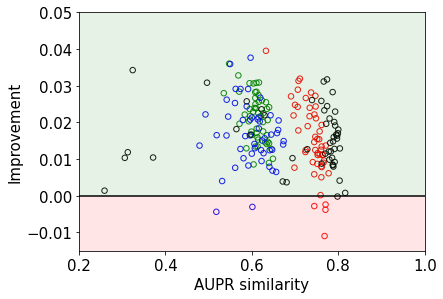

In [ ]:
#Saliency AUPR
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.add_patch( patches.Rectangle( (0.2, 0), 0.8, 0.05, facecolor = 'green', fill=True , alpha=0.1 ) )
ax1.add_patch( patches.Rectangle( (0.2, 0), 0.8, -0.015, facecolor = 'red', fill=True , alpha=0.1 ) )

alpha=0.9
#---------------------
#Cosine
ax1.scatter(SAL_AUPR['cnn-local_relu'], SAL_AUPR_c['cnn-local_relu']-SAL_AUPR['cnn-local_relu'], s=30, edgecolors='g', facecolors='none', marker="o", alpha=alpha) #label='AUPR'
mean2a=np.average(SAL_AUPR_c['cnn-local_relu']-SAL_AUPR['cnn-local_relu'])

#---------------------
#Cosine
ax1.scatter(SAL_AUPR['cnn-local_exponential'], SAL_AUPR_c['cnn-local_exponential']-SAL_AUPR['cnn-local_exponential'], s=30, edgecolors='r', facecolors='none', marker="o", alpha=alpha)
mean2b=np.average(SAL_AUPR_c['cnn-local_exponential']-SAL_AUPR['cnn-local_exponential'])

#---------------------
#Cosine
ax1.scatter(SAL_AUPR['cnn-dist_relu'], SAL_AUPR_c['cnn-dist_relu']-SAL_AUPR['cnn-dist_relu'], s=30, edgecolors='b', facecolors='none', marker="o", alpha=alpha)
mean2c=np.average(SAL_AUPR_c['cnn-dist_relu']-SAL_AUPR['cnn-dist_relu'])

#---------------------
#Cosine
ax1.scatter(SAL_AUPR['cnn-dist_exponential'], SAL_AUPR_c['cnn-dist_exponential']-SAL_AUPR['cnn-dist_exponential'], s=30, edgecolors='black', facecolors='none', marker="o", alpha=alpha)
mean2d=np.average(SAL_AUPR_c['cnn-dist_exponential']-SAL_AUPR['cnn-dist_exponential'])


x__ = np.linspace(0.2, 1.0, 100)
ax1.plot(x__, x__*0, c="black");

ax1.set_xlim(0.2,1.0)
ax1.set_ylim(-0.015,0.05)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)    
fig.tight_layout()  #To prevent filesave cutting of the outside parts of the figure. 

plt.xlabel('AUPR similarity', fontsize=15)
plt.ylabel('Improvement', fontsize=15)
plt.savefig('drive/My Drive/results/AUPR_Saliency.pdf')  
plt.show()

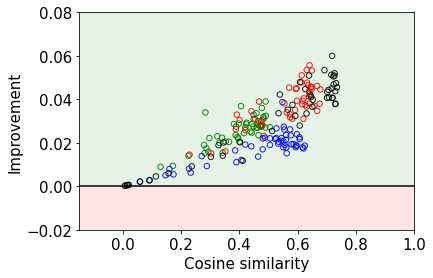

In [26]:
# IG Cosine 
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.add_patch( patches.Rectangle( (-0.15, 0), 1.15, 0.08, facecolor = 'green', fill=True , alpha=0.1 ) )
ax1.add_patch( patches.Rectangle( (-0.15, 0), 1.15, -0.02, facecolor = 'red', fill=True , alpha=0.1 ) )

alpha=0.9
#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-local_relu'], IG_COSINE_c['cnn-local_relu']-IG_COSINE['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'
mean1a=np.average(IG_COSINE_c['cnn-local_relu']-IG_COSINE['cnn-local_relu'])

#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-local_exponential'], IG_COSINE_c['cnn-local_exponential']-IG_COSINE['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)
mean1b=np.average(IG_COSINE_c['cnn-local_exponential']-IG_COSINE['cnn-local_exponential'])

#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-dist_relu'], IG_COSINE_c['cnn-dist_relu']-IG_COSINE['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)
mean1c=np.average(np.nan_to_num(IG_COSINE_c['cnn-dist_relu']-IG_COSINE['cnn-dist_relu']))

#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-dist_exponential'], IG_COSINE_c['cnn-dist_exponential']-IG_COSINE['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)
mean1d=np.average(np.nan_to_num(IG_COSINE_c['cnn-dist_exponential']-IG_COSINE['cnn-dist_exponential']))


#ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#ax1.set_aspect('equal')
#ax1.set_xlim(-0.03,0.19)
#ax1.set_ylim(-0.05,0.09)


x__ = np.linspace(-0.15, 1.0, 100)
ax1.plot(x__, x__*0, c="black");

ax1.set_xlim(-0.15,1.0)
ax1.set_ylim(-0.02,0.08)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)    

#plt.legend(loc='lower right');
plt.xlabel('Cosine similarity', fontsize=15)
plt.ylabel('Improvement', fontsize=15)
plt.savefig('drive/My Drive/results/Cosine_IG.pdf', bbox_inches='tight')  
plt.show()

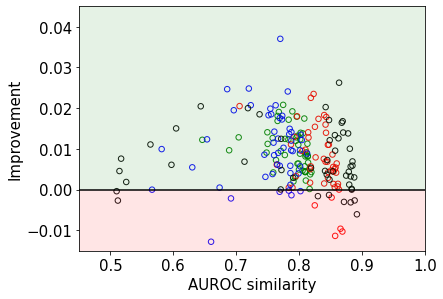

In [ ]:
#IG AUROC
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.add_patch( patches.Rectangle( (0.45, 0), 0.55, 0.045, facecolor = 'green', fill=True , alpha=0.1 ) )
ax1.add_patch( patches.Rectangle( (0.45, 0), 0.55, -0.015, facecolor = 'red', fill=True , alpha=0.1 ) )

alpha=0.9
#---------------------
#Cosine
ax1.scatter(IG_AUROC['cnn-local_relu'], IG_AUROC_c['cnn-local_relu']-IG_AUROC['cnn-local_relu'], s=30, edgecolors='g', facecolors='none', marker="o", alpha=alpha) #label='AUROC'
mean2a=np.average(IG_AUROC_c['cnn-local_relu']-IG_AUROC['cnn-local_relu'])

#---------------------
#Cosine
ax1.scatter(IG_AUROC['cnn-local_exponential'], IG_AUROC_c['cnn-local_exponential']-IG_AUROC['cnn-local_exponential'], s=30, edgecolors='r', facecolors='none', marker="o", alpha=alpha)
mean2b=np.average(IG_AUROC_c['cnn-local_exponential']-IG_AUROC['cnn-local_exponential'])

#---------------------
#Cosine
ax1.scatter(IG_AUROC['cnn-dist_relu'], IG_AUROC_c['cnn-dist_relu']-IG_AUROC['cnn-dist_relu'], s=30, edgecolors='b', facecolors='none', marker="o", alpha=alpha)
mean2c=np.average(IG_AUROC_c['cnn-dist_relu']-IG_AUROC['cnn-dist_relu'])

#---------------------
#Cosine
ax1.scatter(IG_AUROC['cnn-dist_exponential'], IG_AUROC_c['cnn-dist_exponential']-IG_AUROC['cnn-dist_exponential'], s=30, edgecolors='black', facecolors='none', marker="o", alpha=alpha)
mean2d=np.average(IG_AUROC_c['cnn-dist_exponential']-IG_AUROC['cnn-dist_exponential'])

x__ = np.linspace(0.45, 1.0, 100)
ax1.plot(x__, x__*0, c="black");

ax1.set_xlim(0.45,1.0)
ax1.set_ylim(-0.015,0.045)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)    
fig.tight_layout()  #To prevent filesave cutting of the outside parts of the figure. 

plt.xlabel('AUROC similarity', fontsize=15)
plt.ylabel('Improvement', fontsize=15)
plt.savefig('drive/My Drive/results/AUROC_IG.pdf')  
plt.show()

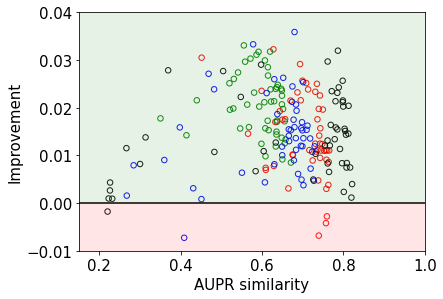

In [ ]:
#IG AUPR
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.add_patch( patches.Rectangle( (0.15, 0), 0.85, 0.04, facecolor = 'green', fill=True , alpha=0.1 ) )
ax1.add_patch( patches.Rectangle( (0.15, 0), 0.85, -0.01, facecolor = 'red', fill=True , alpha=0.1 ) )

alpha=0.9
#---------------------
#Cosine
ax1.scatter(IG_AUPR['cnn-local_relu'], IG_AUPR_c['cnn-local_relu']-IG_AUPR['cnn-local_relu'], s=30, edgecolors='g', facecolors='none', marker="o", alpha=alpha) #label='AUPR'
mean2a=np.average(IG_AUPR_c['cnn-local_relu']-IG_AUPR['cnn-local_relu'])

#---------------------
#Cosine
ax1.scatter(IG_AUPR['cnn-local_exponential'], IG_AUPR_c['cnn-local_exponential']-IG_AUPR['cnn-local_exponential'], s=30, edgecolors='r', facecolors='none', marker="o", alpha=alpha)
mean2b=np.average(IG_AUPR_c['cnn-local_exponential']-IG_AUPR['cnn-local_exponential'])

#---------------------
#Cosine
ax1.scatter(IG_AUPR['cnn-dist_relu'], IG_AUPR_c['cnn-dist_relu']-IG_AUPR['cnn-dist_relu'], s=30, edgecolors='b', facecolors='none', marker="o", alpha=alpha)
mean2c=np.average(IG_AUPR_c['cnn-dist_relu']-IG_AUPR['cnn-dist_relu'])

#---------------------
#Cosine
ax1.scatter(IG_AUPR['cnn-dist_exponential'], IG_AUPR_c['cnn-dist_exponential']-IG_AUPR['cnn-dist_exponential'], s=30, edgecolors='black', facecolors='none', marker="o", alpha=alpha)
mean2d=np.average(IG_AUPR_c['cnn-dist_exponential']-IG_AUPR['cnn-dist_exponential'])

x__ = np.linspace(0.15, 1.0, 100)
ax1.plot(x__, x__*0, c="black");

ax1.set_xlim(0.15,1.0)
ax1.set_ylim(-0.01,0.04)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)    
fig.tight_layout()  #To prevent filesave cutting of the outside parts of the figure. 

plt.xlabel('AUPR similarity', fontsize=15)
plt.ylabel('Improvement', fontsize=15)
plt.savefig('drive/My Drive/results/AUPR_IG.pdf')  
plt.show()

In [ ]:
pip install logomaker

     |████████████████████████████████| 11.8MB 6.4MB/s 


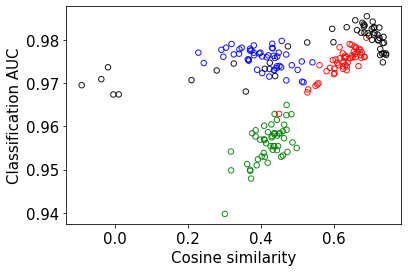

In [29]:
# 4-Saliency Cosine
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)

alpha=0.9
#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-local_relu'], performance_map['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'

#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-local_exponential'], performance_map['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-dist_relu'],  performance_map['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( SAL_COSINE['cnn-dist_exponential'], performance_map['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)

x__ = np.linspace(0.92, 1.0, 100)
#ax1.plot(x__, x__*0, c="black");

ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15) 

#plt.legend(loc='lower right');
plt.xlabel('Cosine similarity', fontsize=15)
plt.ylabel('Classification AUC', fontsize=15)
plt.savefig('drive/My Drive/results/Performance_VS_SaliencyCosine.pdf', bbox_inches='tight')  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

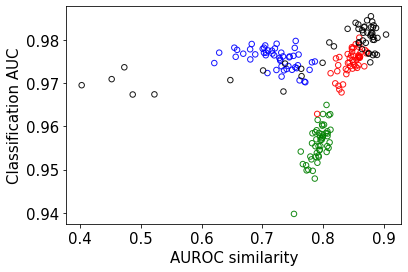

In [ ]:
# SaliencyAUROC
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)

alpha=0.9
#---------------------
#Cosine
ax1.scatter( SAL_AUROC['cnn-local_relu'], performance_map['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'

#---------------------
#Cosine
ax1.scatter( SAL_AUROC['cnn-local_exponential'], performance_map['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( SAL_AUROC['cnn-dist_relu'], performance_map['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( SAL_AUROC['cnn-dist_exponential'], performance_map['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)


x__ = np.linspace(0.92, 1.0, 100)
#ax1.plot(x__, x__*0, c="black");

ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15) 

#plt.legend(loc='lower right');
plt.xlabel('AUROC similarity', fontsize=15)
plt.ylabel('Classification AUC', fontsize=15)
plt.savefig('drive/My Drive/results/Performance_VS_SaliencyAUROC.pdf', bbox_inches='tight')  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

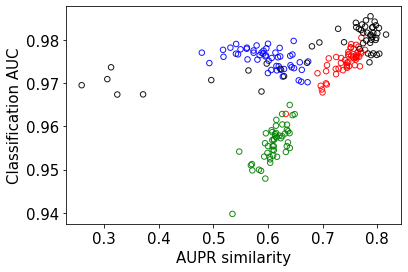

In [ ]:
# SaliencyAUPR
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)


alpha=0.9
#---------------------
#Cosine
ax1.scatter( SAL_AUPR['cnn-local_relu'], performance_map['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'

#---------------------
#Cosine
ax1.scatter( SAL_AUPR['cnn-local_exponential'], performance_map['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( SAL_AUPR['cnn-dist_relu'], performance_map['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( SAL_AUPR['cnn-dist_exponential'], performance_map['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)

x__ = np.linspace(0.92, 1.0, 100)
#ax1.plot(x__, x__*0, c="black");

ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15) 

#plt.legend(loc='lower right');
plt.xlabel('AUPR similarity', fontsize=15)
plt.ylabel('Classification AUC', fontsize=15)
plt.savefig('drive/My Drive/results/Performance_VS_SaliencyAUPR.pdf', bbox_inches='tight')  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

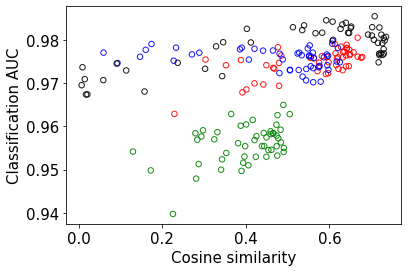

In [30]:
# IG Cosine
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)

alpha=0.9
#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-local_relu'], performance_map['cnn-local_relu'],  s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'

#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-local_exponential'], performance_map['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-dist_relu'], performance_map['cnn-dist_relu'],  s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( IG_COSINE['cnn-dist_exponential'], performance_map['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)

x__ = np.linspace(0.92, 1.0, 100)
#ax1.plot(x__, x__*0, c="black");

ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15) 

#plt.legend(loc='lower right');
plt.xlabel('Cosine similarity', fontsize=15)
plt.ylabel('Classification AUC', fontsize=15)
plt.savefig('drive/My Drive/results/Performance_VS_IGCosine.pdf', bbox_inches='tight')  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

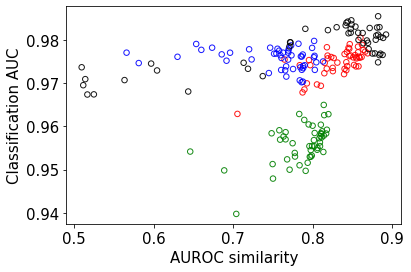

In [ ]:
# IG-AUROC
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)


alpha=0.9
#---------------------
#Cosine
ax1.scatter( IG_AUROC['cnn-local_relu'], performance_map['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'

#---------------------
#Cosine
ax1.scatter( IG_AUROC['cnn-local_exponential'], performance_map['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( IG_AUROC['cnn-dist_relu'], performance_map['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( IG_AUROC['cnn-dist_exponential'], performance_map['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)


x__ = np.linspace(0.92, 1.0, 100)
#ax1.plot(x__, x__*0, c="black");

ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15) 

#plt.legend(loc='lower right');
plt.xlabel('AUROC similarity', fontsize=15)
plt.ylabel('Classification AUC', fontsize=15)
plt.savefig('drive/My Drive/results/Performance_VS_IgAUROC.pdf', bbox_inches='tight')  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

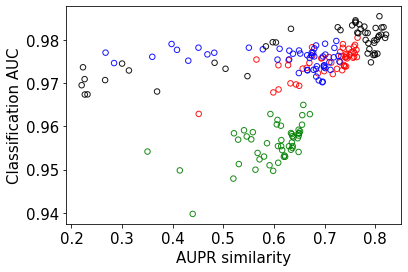

In [ ]:
# IG-AUPR
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()
ax1 = fig.add_subplot(111)


alpha=0.9
#---------------------
#Cosine
ax1.scatter( IG_AUPR['cnn-local_relu'], performance_map['cnn-local_relu'], s=30, edgecolors='g',facecolors='none', marker="o", alpha=alpha) #label='COSINE'

#---------------------
#Cosine
ax1.scatter( IG_AUPR['cnn-local_exponential'], performance_map['cnn-local_exponential'], s=30, edgecolors='r',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( IG_AUPR['cnn-dist_relu'], performance_map['cnn-dist_relu'], s=30, edgecolors='b',facecolors='none', marker="o", alpha=alpha)

#---------------------
#Cosine
ax1.scatter( IG_AUPR['cnn-dist_exponential'], performance_map['cnn-dist_exponential'], s=30, edgecolors='black',facecolors='none', marker="o", alpha=alpha)


x__ = np.linspace(0.92, 1.0, 100)
#ax1.plot(x__, x__*0, c="black");

ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15) 

#plt.legend(loc='lower right');
plt.xlabel('AUPR similarity', fontsize=15)
plt.ylabel('Classification AUC', fontsize=15)
plt.savefig('drive/My Drive/results/Performance_VS_IgAUPR.pdf', bbox_inches='tight')  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

ANGLE STATISTICS (move some parts above here too)

In [7]:
saliency_map_raw_cumulative=np.array(saliency_map_raw_cumulative)

'''orthogonal_residual=(saliency_map_raw_cumulative[:,:,:,0]+saliency_map_raw_cumulative[:,:,:,1]+saliency_map_raw_cumulative[:,:,:,2]+saliency_map_raw_cumulative[:,:,:,3]) 
L2 = np.sqrt(np.sum(np.square(saliency_map_raw_cumulative[:,:,:,:]), axis=3))
sine = 1/2 * orthogonal_residual /L2 
sine = np.arcsin(sine) * 180 /( 3.1416) '''
sine = geomath.calculate_angles(saliency_map_raw_cumulative)

#sine_std = np.std(sine, axis=0)
#sine_std =np.array(sine_std.reshape(len(sine_std)*len(sine_std[0]),))

#Make 50 copies and append, to make the same size array as saliency_map_raw_cumulative
X_model_normalized =  np.swapaxes(X_model, 1,2) -0.25
X_model_normalized_50 = []
for i in range (0,len(saliency_map_raw_cumulative)):
    X_model_normalized_50.append(X_model_normalized)   
X_model_normalized_50=np.array(X_model_normalized_50)    

#Improvement
saliency_map_raw_cumulative_CORRECTED = saliency_map_raw_cumulative - 0.25* np.sum(saliency_map_raw_cumulative, axis=3, keepdims=True) 
similarity1= np.sum(saliency_map_raw_cumulative * X_model_normalized_50, axis=3) / ( np.sqrt(np.sum(saliency_map_raw_cumulative*saliency_map_raw_cumulative, axis=3))  *  np.sqrt(np.sum(X_model_normalized_50*X_model_normalized_50, axis=3)) )
similarity2= np.sum(saliency_map_raw_cumulative_CORRECTED * X_model_normalized_50, axis=3) / ( np.sqrt(np.sum(saliency_map_raw_cumulative_CORRECTED*saliency_map_raw_cumulative_CORRECTED, axis=3))  *  np.sqrt(np.sum(X_model_normalized_50*X_model_normalized_50, axis=3)) )
improvement = similarity2 - similarity1

#saliency_wild:
saliency_wild1= np.sum(saliency_map_raw_cumulative * X, axis=3)
saliency_wild2= np.sum(saliency_map_raw_cumulative_CORRECTED * X, axis=3)

#similarity1[7,100,41]
print(saliency_map_raw_cumulative[7,100,41])
print(X_model_normalized_50[7,100,41])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


[ 0.00436859  0.01749961  0.01331627 -0.01026113]
[-0.03967273 -0.01174545  0.10636362 -0.05494545]


(-0.75, 1.0)

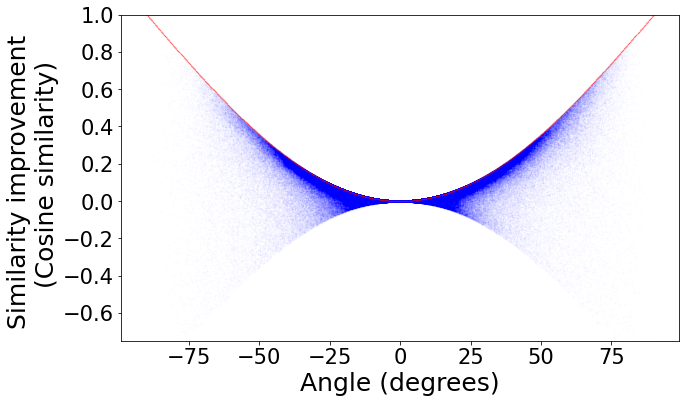

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

#fig = plt.figure()
#ax1 = fig.add_subplot(111)

plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)  #plt.scatter(sine, improvement, s=0.3, c='b', marker="o", label='zadaca', alpha=0.01)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Similarity improvement \n (Cosine similarity)', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)

#Highlight bins
sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
bin_map=np.linspace(-90,90,1000)
bin_points = 1-np.abs(np.cos(bin_map/180*3.1416))
plt.scatter(bin_map, bin_points, s=0.1, c='red', marker="o", label='zadaca', alpha=0.5)

plt.ylim(-0.75,1)           
#
#plt.savefig('drive/My Drive/results/U_scatter.pdf', dpi='figure')  
#plt.show()

(array([7.13915638e-06, 9.88498576e-06, 2.30649668e-05, 4.33839171e-05,
        6.37032415e-05, 8.01782178e-05, 1.08185677e-04, 1.52668113e-04,
        2.08683033e-04, 2.58656012e-04, 3.76178625e-04, 4.35488539e-04,
        5.11822596e-04, 5.57952529e-04, 6.73825076e-04, 7.88053031e-04,
        8.73173742e-04, 9.92889762e-04, 1.04835766e-03, 1.16972331e-03,
        1.29987282e-03, 1.40696297e-03, 1.55908192e-03, 1.70295971e-03,
        1.91329391e-03, 2.10330530e-03, 2.45970865e-03, 2.76779601e-03,
        3.11926217e-03, 3.64425689e-03, 3.95015014e-03, 4.46362023e-03,
        5.08087720e-03, 5.92494424e-03, 6.62623545e-03, 7.65646238e-03,
        8.98159821e-03, 1.05961556e-02, 1.18443968e-02, 1.30586013e-02,
        1.50460467e-02, 1.75804282e-02, 1.85716816e-02, 1.96260795e-02,
        2.06639913e-02, 2.18815025e-02, 2.27211767e-02, 2.29040426e-02,
        2.31758827e-02, 2.23559786e-02, 2.18155997e-02, 2.10720296e-02,
        1.94009164e-02, 1.76424934e-02, 1.65436131e-02, 1.497024

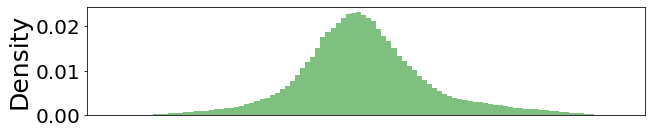

In [9]:
sine_flattened = np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))
improvement_flattened = np.array(improvement.reshape(len(improvement)*len(improvement[0])*len(improvement[0,0]),))
index = np.where(np.abs(improvement_flattened)>0)[0]  #No NAs
sine_flattened=sine_flattened[index]

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened, 100, density=True, alpha=0.5, color='g')

In [10]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)

-0.6953414
22.727219
(1029134,)


(-0.6, 0.8)

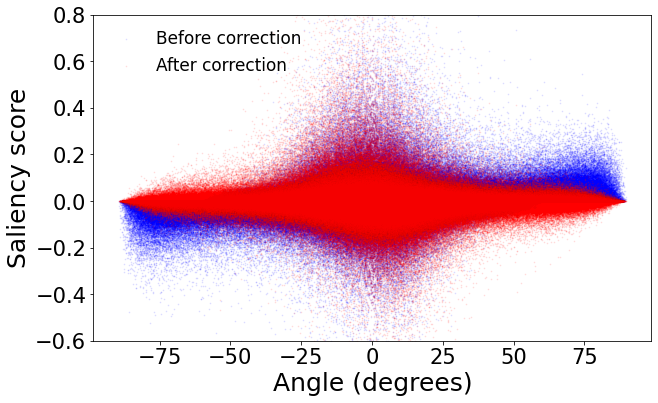

In [42]:
# Only negative 
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
plt.figure(figsize=(10, 6))

#DIFFERENT DEFINITION
X_model_normalized = ( np.log2(4) + np.sum(np.swapaxes(X_model, 1,2)*np.log2(np.swapaxes(X_model, 1,2)+1e-10),axis=2, keepdims=True)   )
X_model_normalized_50 = []
for i in range (0,len(saliency_map_raw_cumulative)):
    X_model_normalized_50.append(X_model_normalized[:,:,0])   
X_model_normalized_50=np.array(X_model_normalized_50)    

plt.scatter(sine[X_model_normalized_50==0], saliency_wild1[X_model_normalized_50==0], s=0.5, c='b', marker="o",  alpha=0.1, label='Before correction')
plt.scatter(sine[X_model_normalized_50==0], saliency_wild2[X_model_normalized_50==0], s=0.5, c='r', marker="o",  alpha=0.1, label='After correction')

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Saliency score', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(loc='upper left', fontsize=17, frameon=False);
plt.ylim(-0.6,0.8)

(-0.6, 0.8)

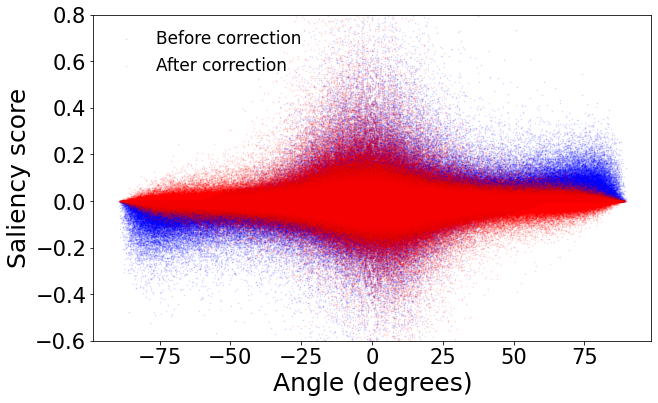

In [12]:
# Only negative , slightly different version
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
plt.figure(figsize=(10, 6))

#DIFFERENT DEFINITION
X_model_normalized = np.sum( ( np.swapaxes(X_model, 1,2) -0.25 ) * X , axis=-1 , keepdims=True)
X_model_normalized_50 = []
for i in range (0,len(saliency_map_raw_cumulative)):
    X_model_normalized_50.append(X_model_normalized[:,:,0])   
X_model_normalized_50=np.array(X_model_normalized_50)    

plt.scatter(sine[X_model_normalized_50==0], saliency_wild1[X_model_normalized_50==0], s=0.5, c='b', marker="o",  alpha=0.1, label='Before correction')
plt.scatter(sine[X_model_normalized_50==0], saliency_wild2[X_model_normalized_50==0], s=0.5, c='r', marker="o",  alpha=0.1, label='After correction')

plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('Saliency score', fontsize=25)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(loc='upper left', fontsize=17, frameon=False);
plt.ylim(-0.6,0.8)

(0.0, 10.0)

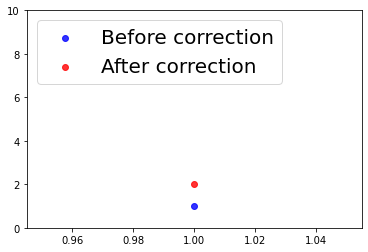

In [43]:
plt.scatter(1, 1, s=35.5, c='b', marker="o",  alpha=0.8, label='Before correction')
plt.scatter(1, 2, s=35.5, c='r', marker="o",  alpha=0.8, label='After correction')
plt.legend(loc='upper left', fontsize=20);
plt.ylim(0,10)

(array([2.30569000e-05, 1.13035528e-04, 2.59108943e-04, 4.33584039e-04,
        6.30971750e-04, 8.28364836e-04, 1.02307964e-03, 1.13232356e-03,
        1.29245172e-03, 1.43782878e-03, 1.53511153e-03, 1.62101944e-03,
        1.73517231e-03, 1.82108108e-03, 1.90444776e-03, 2.03871231e-03,
        2.12208286e-03, 2.22780741e-03, 2.35771363e-03, 2.50139779e-03,
        2.62610214e-03, 2.77442581e-03, 2.93048199e-03, 3.08274221e-03,
        3.28110934e-03, 3.49987616e-03, 3.78991571e-03, 3.98336913e-03,
        4.32880160e-03, 4.58509927e-03, 4.97031903e-03, 5.37156618e-03,
        5.74315471e-03, 6.26853773e-03, 6.71885119e-03, 7.24227205e-03,
        7.81279095e-03, 8.44769161e-03, 9.09512286e-03, 9.68729279e-03,
        1.04667301e-02, 1.11141583e-02, 1.18573172e-02, 1.26367479e-02,
        1.32854422e-02, 1.39514262e-02, 1.45129397e-02, 1.49400614e-02,
        1.54792255e-02, 1.57657502e-02, 1.58860963e-02, 1.59028266e-02,
        1.57573179e-02, 1.54293125e-02, 1.49715558e-02, 1.442043

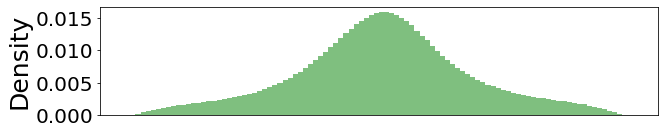

In [13]:
sine_negative = sine[X_model_normalized_50==0] 

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False) 
plt.hist(sine_negative, 100, density=True, alpha=0.5, color='g')

In [14]:
!pip install logomaker 

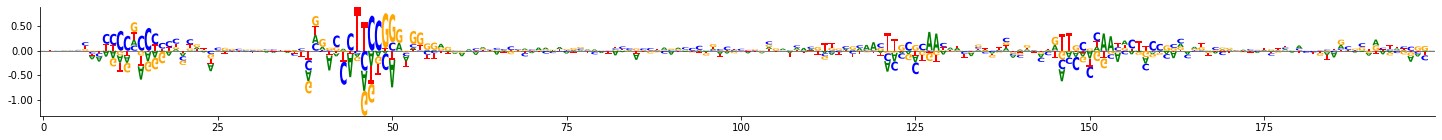

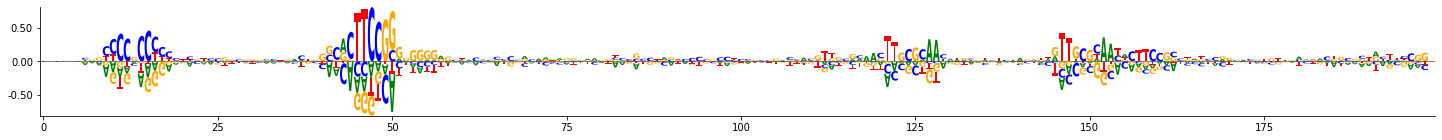

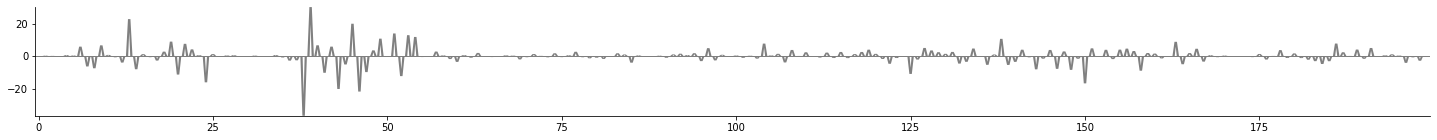

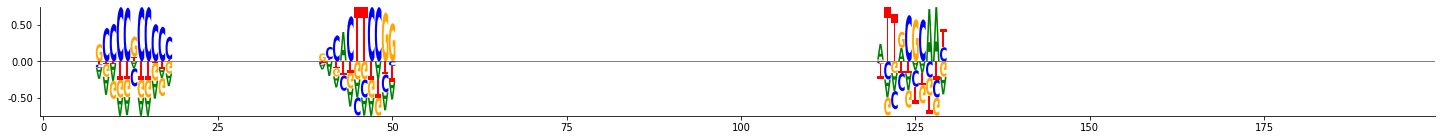

In [52]:
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=49

X_50=[]
for i in range (0,len(saliency_map_raw_cumulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 
import pandas as pd

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

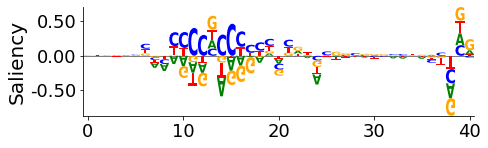

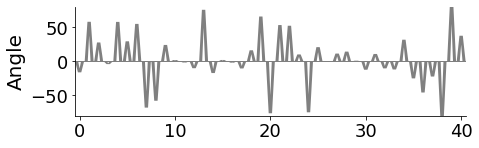

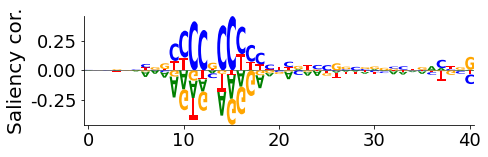

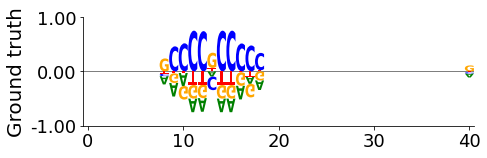

In [54]:
saliency_map_raw
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=49

X_50=[]
for i in range (0,len(saliency_map_raw_cumulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] # np.sin(np.expand_dims(sine,3)/180*3.1416)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))
sine_dimensionsadapted2=np.expand_dims(sine,3)[run_]

from matplotlib.ticker import FormatStrFormatter

import logomaker 


#CUT
b1=0
b2=41
sine_dimensionsadapted_CUT=sine_dimensionsadapted[:,b1:b2]
sine_dimensionsadapted2_CUT=sine_dimensionsadapted2[:,b1:b2]
#X_model_CUT=X_model[:,b1:b2]
saliency_map_raw_CUT=saliency_map_raw[:,b1:b2]
saliency_map_raw_CORRECTED_CUT=saliency_map_raw_CORRECTED[:,b1:b2]



# PLOT for p=0 parameter (default classical saliency)
N, L, A = saliency_map_raw_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CUT[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.7,0.7))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Saliency', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    fig = plt.gcf()

# PLOT angle
N, L, A = sine_dimensionsadapted_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted_CUT)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    plt.ylim((-80,80)) 
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Angle', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()


'''# PLOT angle
N, L, A = sine_dimensionsadapted2_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted2_CUT)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.figure.set_size_inches(7, 2)
    #ax.set_ylabel('Angle x L2', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()'''


# PLOT for p=-0.333 parameter 
N, L, A = saliency_map_raw_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED_CUT[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.7,0.7)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Saliency cor.', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()



# PLOT ground truth
N, L, A = saliency_map_raw_CUT.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (np.swapaxes(X_model-0.25, 1,2)[:,b1:b2])[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    plt.ylim((-1.00,1.00)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.figure.set_size_inches(7, 2)
    ax.set_ylabel('Ground truth', fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)    
    fig = plt.gcf()

In [55]:
#### COUNT LARGE ANGLES

sine_batch = sine #[49]
XX=np.sum(X_model_normalized,axis=2)



#count lare angles
large_angle = 30
count_large_angles30 = np.zeros((len(sine),len(sine[0])))
for z in range (len(sine)):
    for i in range (len(sine[0])):
        count=0
        for j in range (len(sine[0,0])):
            if(np.abs(sine[z,i,j])>large_angle): count+=1  
        count_large_angles30[z,i]=count
count_large_angles30=np.array(count_large_angles30.reshape(len(count_large_angles30)*len(count_large_angles30[0]),))  
count_large_angles30=100* count_large_angles30/len(sine[0,0])

#count lare angles
large_angle = 45
count_large_angles45 = np.zeros((len(sine),len(sine[0])))
for z in range (len(sine)):
    for i in range (len(sine[0])):
        count=0
        for j in range (len(sine[0,0])):
            if(np.abs(sine[z,i,j])>large_angle): count+=1  
        count_large_angles45[z,i]=count
count_large_angles45=np.array(count_large_angles45.reshape(len(count_large_angles45)*len(count_large_angles45[0]),))  
count_large_angles45=100* count_large_angles45/len(sine[0,0])

#count lare angles
large_angle = 60
count_large_angles60 = np.zeros((len(sine),len(sine[0])))
for z in range (len(sine)):
    for i in range (len(sine[0])):
        count=0
        for j in range (len(sine[0,0])):
            if(np.abs(sine[z,i,j])>large_angle): count+=1  
        count_large_angles60[z,i]=count
count_large_angles60=np.array(count_large_angles60.reshape(len(count_large_angles60)*len(count_large_angles60[0]),))  
count_large_angles60=100* count_large_angles60/len(sine[0,0])

(-2.0, 50.0)

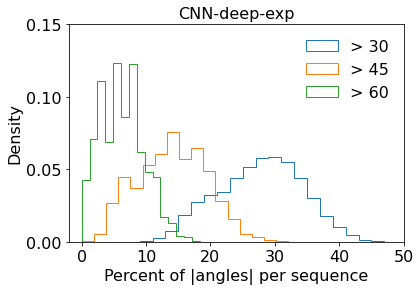

In [56]:
#plt.figure(figsize=(10,2))
plt.hist(count_large_angles30,20,  histtype='step', stacked=True, fill=False, label = '> 30', density=True)
plt.hist(count_large_angles45,18,  histtype='step', stacked=True, fill=False, label = '> 45', density=True)
plt.hist(count_large_angles60,18,  histtype='step', stacked=True, fill=False, label = '> 60', density=True)

plt.ylabel('Density', fontsize=16)
plt.xlabel('Percent of |angles| per sequence', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0, 0.05, 0.10, 0.15], fontsize=16)
plt.legend(loc='upper right', fontsize=16, frameon=False);
plt.title("CNN-deep-exp", fontsize=16, loc='center', pad=None)
plt.xlim(-2,50)

In [59]:
### Angle standard deviation, and percentages of angles above cetrain thresholds. 

sine_flat = sine.reshape(-1)
sine_no_nan = sine_flat [np.logical_not( np.isnan(sine_flat))]
print(np.std(sine_no_nan))

print()

print(np.average(count_large_angles30))
print(np.average(count_large_angles45))
print(np.average(count_large_angles60))

29.34069

27.45486
14.01976
6.26656


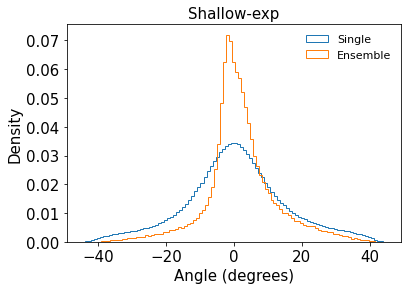

In [63]:
## Angles of ensemble models, comparison plot with angles of individual runs 

import matplotlib.pyplot as plt

saliency_map_raw_AVERAGE = np.average(np.array(saliency_map_raw_cumulative)  , axis = 0)

'''orthogonal_residual=(saliency_map_raw_AVERAGE[:,:,0]+saliency_map_raw_AVERAGE[:,:,1]+saliency_map_raw_AVERAGE[:,:,2]+saliency_map_raw_AVERAGE[:,:,3]) 
L2 = np.sqrt(np.sum(np.square(saliency_map_raw_AVERAGE[:,:,:]), axis=2))
sine = 1/2 * orthogonal_residual /L2 
sine = np.arcsin(sine) * 180 /( 2* 3.1416) '''
sine_ensemble = geomath.calculate_angles(saliency_map_raw_AVERAGE)
sine_ensemble =np.array(sine_ensemble.reshape(len(sine_ensemble)*len(sine_ensemble[0]),))

saliency_map_raw_cumulative=np.array(saliency_map_raw_cumulative)
'''orthogonal_residual=(saliency_map_raw_cumulative[:,:,:,0]+saliency_map_raw_cumulative[:,:,:,1]+saliency_map_raw_cumulative[:,:,:,2]+saliency_map_raw_cumulative[:,:,:,3]) 
L2 = np.sqrt(np.sum(np.square(saliency_map_raw_cumulative[:,:,:,:]), axis=3))
sine = 1/2 * orthogonal_residual /L2 
sine = np.arcsin(sine) * 180 /( 2* 3.1416) '''
sine = geomath.calculate_angles(saliency_map_raw_cumulative)
sine =np.array(sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),))

plt.xlabel('Angle (degrees)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.hist(sine, 100, density=True, histtype='step', label = 'Single')
plt.hist(sine_ensemble, 100, density=True, histtype='step', label = 'Ensemble')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Shallow-exp',fontsize=15)
#plt.hist(count_large_angles30,20,  histtype='step', stacked=True, fill=False, label = '> 30', density=True)
#plt.hist(count_large_angles45,18,  histtype='step', stacked=True, fill=False, label = '> 45', density=True)
#plt.hist(count_large_angles60,18,  histtype='step', stacked=True, fill=False, label = '> 60', density=True)
plt.legend(loc='upper right', fontsize=11, frameon=False);
#plt.yscale('log')